In [1]:
# import modules
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
import calendar

In [2]:
#import file with data  
dataset = pd.read_csv("C:/Users/alexb/Downloads/Uber_excel.csv")
dataset

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
#clean dataset to find null values
dataset.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [4]:
def convert_time(column_name):
    # Convert the column to a datetime column
  dataset[column_name] = pd.to_datetime(dataset[column_name], format='%m/%d/%Y %H:%M', errors='coerce')

# Convert the START_DATE* column
convert_time('START_DATE*')

# Convert the END_DATE* column
convert_time('END_DATE*')

In [5]:
#convert the START_DATE* column to a datetime column
dataset['START_DATE*'] = pd.to_datetime(dataset['START_DATE*'])

#extract the year, month, and day from the START_YEAR* column
dataset['year'] = dataset['START_DATE*'].dt.year
dataset['month'] = dataset['START_DATE*'].dt.month
dataset['day'] = dataset['START_DATE*'].dt.day

<AxesSubplot:>

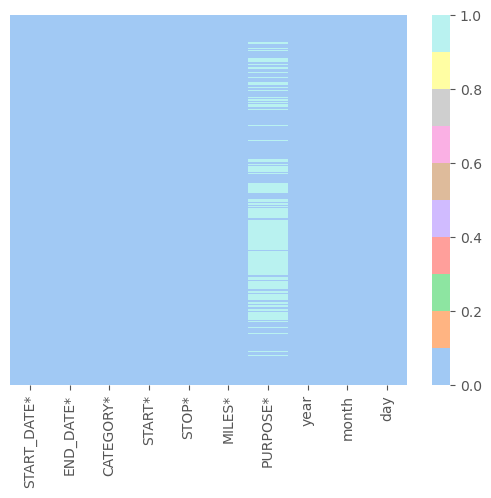

In [6]:
# display heatmap with null values
sns.heatmap(dataset.isnull(),yticklabels=False,cmap=sns.color_palette("pastel"))

<AxesSubplot:>

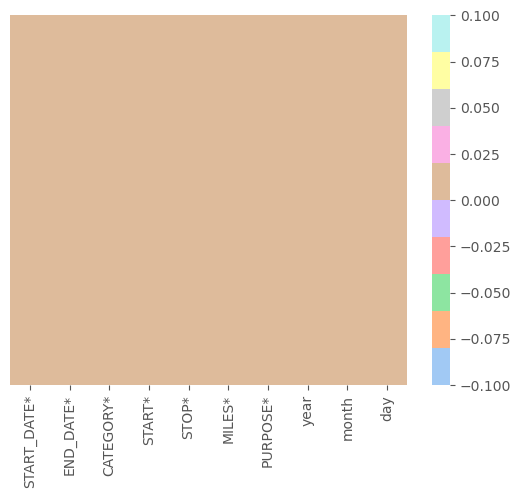

In [7]:
# drop null values in dataset
dataset=dataset.dropna()

# display heatmap without null values
sns.heatmap(dataset.isnull(),yticklabels=False,cmap=sns.color_palette("pastel"))

## Plot of the Number of Trips in Each Category

([<matplotlib.axis.XTick at 0x258bded71f0>,
 [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

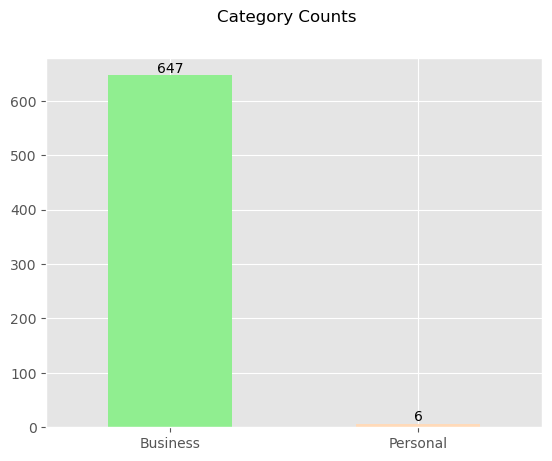

In [8]:
#use a colormap
colors = ['lightgreen', 'peachpuff']

#create the bar chart
counts = dataset['CATEGORY*'].value_counts()
plot = counts.plot(kind='bar', color=colors)

#add a title to the chart
title = plt.suptitle('Category Counts')

#add the values to the chart 
for i, v in enumerate(counts):
    plot.text(i, v, str(v), color='black', ha='center', va='bottom')
    
#make the x axis labels horizontal
plt.xticks(np.arange(len(counts)), counts.index, rotation=0)

In [9]:
#extract month from start date
dataset_copy = dataset.copy()

# convert the START_DATE* column to a datetime column
dataset_copy['START_DATE*'] = pd.to_datetime(dataset_copy['START_DATE*'])

# extract the year, month, and day from the START_YEAR* column
dataset_copy['Year'] = dataset_copy['START_DATE*'].dt.year
dataset_copy['Month'] = dataset_copy['START_DATE*'].dt.month
dataset_copy['Day'] = dataset_copy['START_DATE*'].dt.day

In [10]:
# calculate duration of each trip in minutes
dataset_copy = dataset.copy()
dataset_copy['Duration_Minutes'] = (dataset_copy['END_DATE*'] - dataset_copy['START_DATE*']).dt.total_seconds() / 60

## Plot of the Number of Trips Per Month 

Text(0.5, 1.0, 'Number of trips per Month')

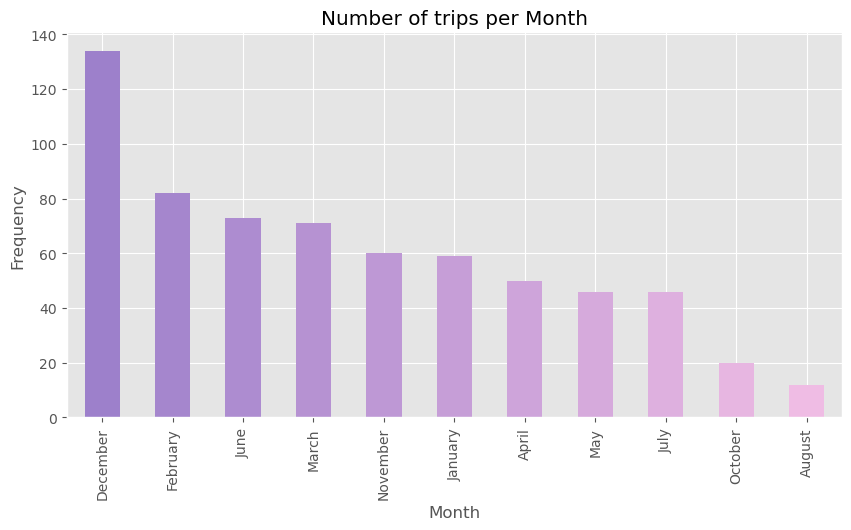

In [11]:
# dataset.head()

def convert(x):
    if type(x) == float or type(x) == int:
        return calendar.month_name[int(x)]
    else:
        return x

dataset['month'] = dataset['month'].apply(convert)

# dataset['month']= dataset['month'].apply(lambda x:calendar.month_name[int(float(x))])
x = dataset['month'].value_counts()

# print(calendar.month_name)
x.plot(kind='bar',figsize=(10,5),color= ["#9D80CB","#A586CD","#AD8CD0","#B692D2","#BE98D5","#C69ED7","#CEA4DA","#D6AADC","#DEB0DF","#E7B6E1","#EFBCE4","#F7C2E6"])
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Number of trips per Month')

## December has the Highest Number of Trips at 3:00PM

Text(0.5, 1.0, 'Number of Trips at 3:00 PM')

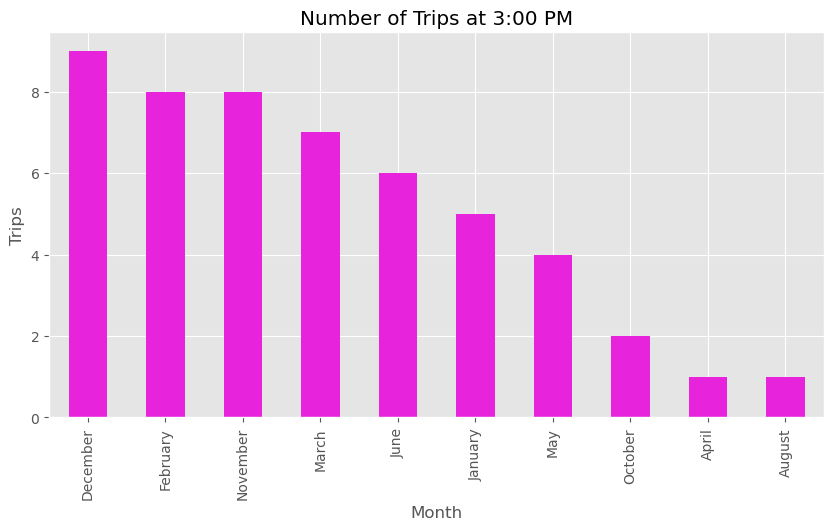

In [12]:
# Extract the month from the 'START_DATE*' column
dataset['MONTH'] = dataset['START_DATE*'].dt.month

# Create a filtered dataset that only includes trips taken at 3:00 PM
trips_at_3pm = dataset[dataset['START_DATE*'].dt.hour == 15]

# Create a dictionary that maps numerical month values to month names
month_map = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
             7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

# Use the 'MONTH' column and the '.map()' function to replace the numerical month values with the month names
trips_at_3pm['MONTH'] = trips_at_3pm['MONTH'].map(month_map)

# Count the number of trips taken in each month
monthly_trips_at_3pm = trips_at_3pm['MONTH'].value_counts()

monthly_trips_at_3pm.plot(kind='bar', color='#E723DB', figsize=(10,5))
plt.xlabel('Month')
plt.ylabel('Trips')
plt.title('Number of Trips at 3:00 PM')

## The number of Trips Per Hour 

Text(0.5, 1.0, 'Number of Trips Per Hour')

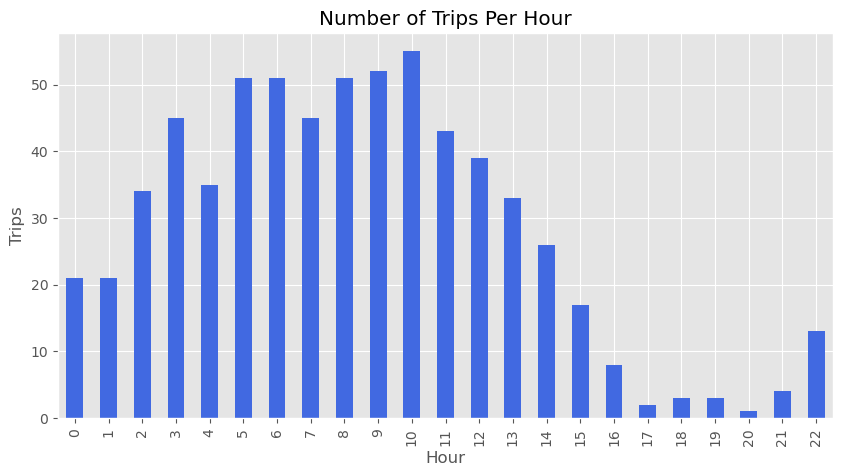

In [13]:
# Create a new variable `hours`
hours = dataset['START_DATE*'].dt.hour

# Count the number of trips per hour
hours = hours.value_counts().sort_index()


# Sort the hours object in descending order
hours = hours.sort_index(ascending=False)

# Create a bar plot
ax = hours.plot(kind='bar', color='royalblue', figsize=(10,5))

# Get the x-axis labels and convert them to strings
labels = [str(int(x)) for x in ax.get_xticks()]


ax.set_xticklabels(labels)


plt.xlabel('Hour')
plt.ylabel('Trips')
plt.title('Number of Trips Per Hour')

## Trips Per Day of the Week 

Text(0.5, 1.0, 'Frequency of Weekdays')

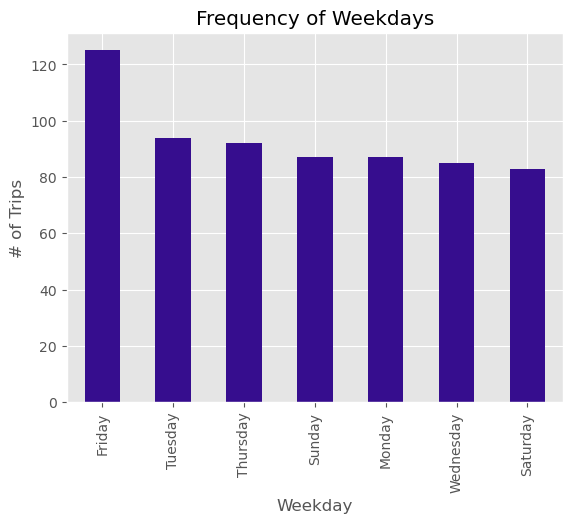

In [14]:
# Convert the 'START_DATE*' column to datetime format
dataset['START_DATE*'] = pd.to_datetime(dataset['START_DATE*'])

# Extract the integer representing the day of the week and store it in 'WEEKDAY' column
dataset['WEEKDAY'] = dataset['START_DATE*'].dt.weekday

# Create a dictionary to map the integers to the names of the weekdays
weekday_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

# Map the integers to the names of the weekdays and store it in 'WEEKDAY' column
dataset['WEEKDAY'] = dataset['WEEKDAY'].map(weekday_map)

# Count the frequency of each weekday
weekday_counts = dataset['WEEKDAY'].value_counts()

weekday_counts.plot(kind='bar', color='#360D8E')
plt.xlabel('Weekday')
plt.ylabel('# of Trips')
plt.title('Frequency of Weekdays')

## Trips of 5 or More Taken by Each Person 

Text(0.5, 1.0, 'Number of Trips Taken by a Person (5 or more)')

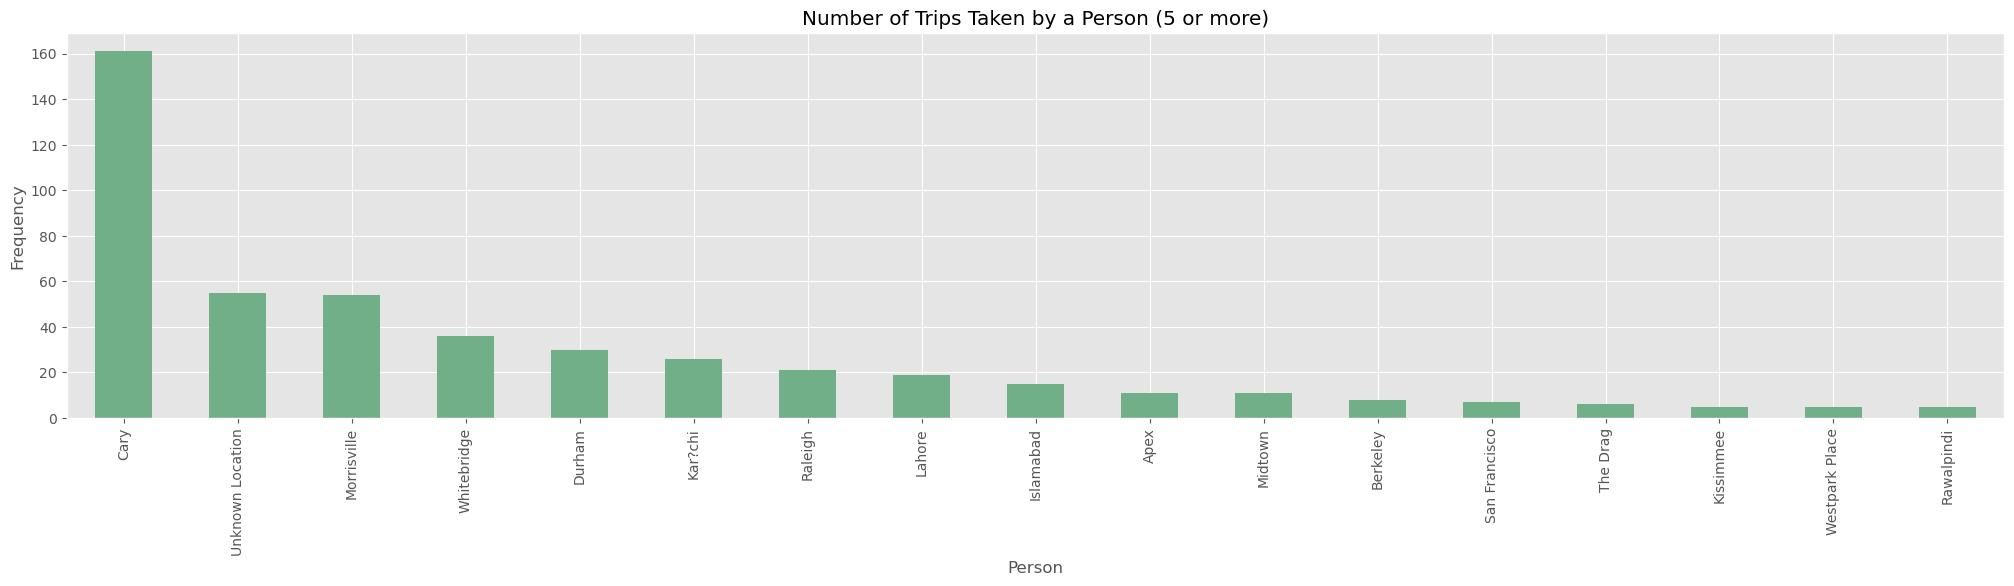

In [15]:
# Count trips 5 or more taken by each person
trips_more_than_5 = dataset['START*'].value_counts()[dataset['START*'].value_counts() >= 5]

# Plot the number of trips 5 or more taken by each person
trips_more_than_5.plot(kind='bar',figsize=(25,5),color='#70AF87')

plt.xlabel('Person')
plt.ylabel('Frequency')
plt.title('Number of Trips Taken by a Person (5 or more)')